In [1]:
%matplotlib inline

from PIL import Image

import matplotlib.pyplot as plt
import matplotlib.image as imgplot
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from pylab import *
import random
# from random import *
import cv2


import time
import tensorflow as tf
tf.set_random_seed(1)

import keras
import sys
import os
print ("Keras {} TF {} Python {}".format(keras.__version__, tf.__version__, sys.version_info))


Keras 2.2.4 TF 1.15.5 Python sys.version_info(major=3, minor=6, micro=13, releaselevel='final', serial=0)


Using TensorFlow backend.


In [2]:
dataset = '/home/ec2-user/SageMaker/style_64/train'
folders = os.listdir(dataset)

In [3]:
files = os.path.join(dataset,str(folders[0]))

In [4]:
os.path.join(files,random.choice(os.listdir(files)))

'/home/ec2-user/SageMaker/style_64/train/Pointillism/paul-signac_samois-study-nr-8-1899.jpg'

In [5]:
np.random.seed(seed=42)
x_train = []
y_train = []
idx = []
img_idx = []
k = 0

for i in range(len(folders)):
    files = os.path.join(dataset,str(folders[i]))
    n = 0
   
    while n < 75:
        rnd = os.path.join(files,random.choice(os.listdir(files)))
        img_idx.append(k + os.listdir(files).index(rnd.split('/')[-1]))
        img = Image.open(rnd)
        x_train.append(asarray(img))
#         x_train.append(Image.open(rnd).convert("L").getdata())
        y_train.append(folders[i])
        idx.append(i)
        n += 1
    k += len(os.listdir(files))
    

In [6]:
y_train =np.array(y_train)
x_train =np.array(x_train)
img_idx = np.array(img_idx)

In [7]:
img_idx

array([  201,   220,   347, ..., 38361, 39276, 38646])

In [8]:
print(np.shape(x_train))
print(np.shape(y_train))
print(np.shape(img_idx))
print(np.unique(y_train,return_counts=True))
# y_train.shape

(1050, 64, 64, 3)
(1050,)
(1050,)
(array(['Abstract_Expressionism', 'Baroque', 'Contemporary_Realism',
       'Cubism', 'Expressionism', 'Fauvism', 'High_Renaissance',
       'Impressionism', 'Minimalism', 'Naive_Art_Primitivism',
       'Pointillism', 'Pop_Art', 'Post_Impressionism', 'Realism'],
      dtype='<U22'), array([75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75]))


In [9]:
labels=np.array(folders)

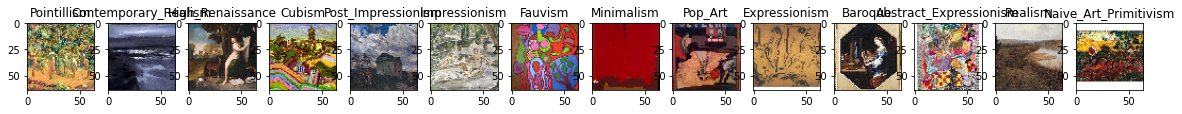

In [10]:
#sample image of each label
plt.figure(figsize=(20,20))
for i in range(0,len(np.unique(y_train))):
    rmd=np.random.choice(np.where(y_train==folders[i])[0],1)
    plt.subplot(1,14,i+1)
    img=x_train[rmd]
    plt.imshow(img[0,:,:,:])
    plt.title(labels[i])

In [11]:
import numpy as np
from sklearn.decomposition import PCA

In [352]:
pca = PCA(n_components=2)
pca.fit(x_train.reshape((len(x_train),64*64*3)))

PCA(n_components=2)

In [ ]:
print(pca.explained_variance_ratio_)

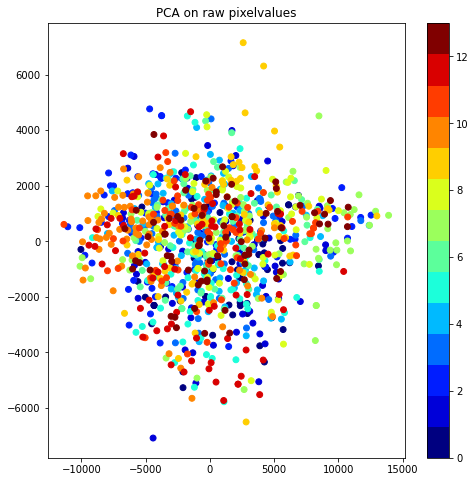

In [358]:
fig = plt.figure(figsize=(8,8))
cmap = cm.get_cmap('jet', 14)
plt.scatter(x=pca.transform(x_train.reshape((len(x_train),64*64*3)))[:,0],
            y=pca.transform(x_train.reshape((len(x_train),64*64*3)))[:,1],
            c=idx,s=35,cmap=cmap)
plt.title("PCA on raw pixelvalues")
plt.colorbar()
plt.show()
fig.savefig('plots/pca_raw.png')

In [12]:
from sklearn.manifold import TSNE

In [280]:
# takes some time
model = TSNE(n_components=2, random_state=0)
tsne = model.fit_transform(x_train.reshape((len(x_train),64*64*3)))

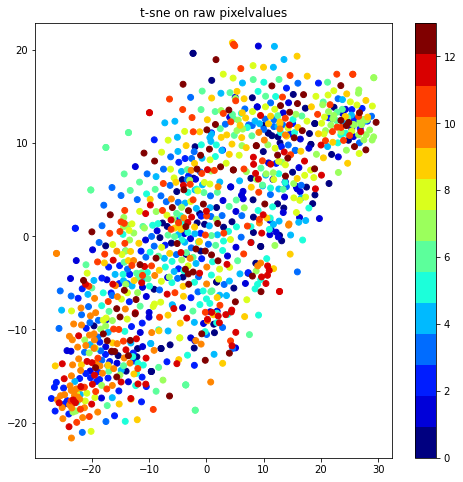

In [282]:
fig = plt.figure(figsize=(8,8))
cmap = cm.get_cmap('jet', 14)
plt.scatter(x=tsne[:,0],y=tsne[:,1],c=idx,s=35,cmap=cmap)
plt.title("t-sne on raw pixelvalues")
plt.colorbar()
plt.show()
fig.savefig('plots/tsne_raw.png')

In [13]:
# Downloading the data, if it does not exist
import urllib
import os
import h5py

In [14]:
import pickle


with open('feature_vectors.pkl', 'rb') as f:
    data = pickle.load(f)

In [15]:
data.shape

(39753, 14)

In [16]:
Data = []
for d in img_idx:
    Data.append(data[d])
    

In [17]:
np.shape(Data)

(1050, 14)

In [18]:
pca = PCA(n_components=2)
pca.fit(Data)

PCA(n_components=2)

In [19]:
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.93976372 0.03463799]
[13.66219607  2.62293498]


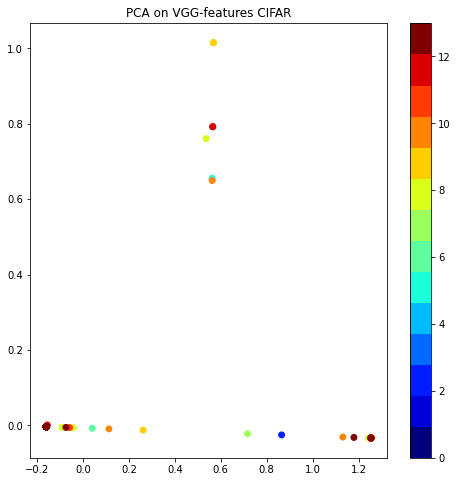

In [291]:
fig = plt.figure(figsize=(8,8))
cmap = cm.get_cmap('jet', 14)
plt.scatter(x=pca.transform(Data)[:,0],
            y=pca.transform(Data)[:,1],
            c=idx,s=35,cmap=cmap)
plt.title("PCA on VGG-features CIFAR")
plt.colorbar()
plt.show()
fig.savefig('plots/pca_vgg.png')

In [20]:
pca = PCA(n_components=3)
pca.fit(Data)

PCA(n_components=3)

In [21]:
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.93976372 0.03463799 0.01009161]
[13.66219607  2.62293498  1.41576578]


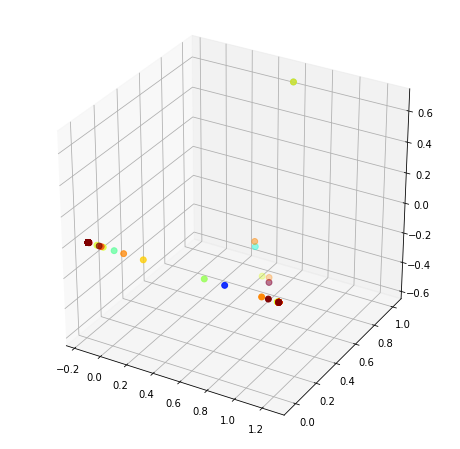

In [349]:
fig = plt.figure(figsize=(8,8))
cmap = cm.get_cmap('jet', 14)
ax = plt.axes(projection='3d')
ax.scatter3D(pca.transform(Data)[:,0],
             pca.transform(Data)[:,1],
             pca.transform(Data)[:,2],
            c=idx,s=35,cmap=cmap)
# plt.title("PCA on VGG16-features")
# plt.colorbar()
# plt.show()
fig.savefig('plots/pca_vgg_all_3d_small.png')

In [299]:
len_fol = []
k = 0
for i in range(len(folders)):
    for j in range(len(os.listdir(os.path.join(dataset,folders[i])))):
        len_fol.append(k)
    k+=1

In [300]:
print(np.unique(len_fol,return_counts=True))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]), array([ 359,  553,  937, 1782, 4501, 9130,  653, 2000, 1026, 4687, 2967,
       1993, 7491, 1674]))


In [22]:
pca = PCA(n_components=2)
pca.fit(data)

PCA(n_components=2)

In [23]:
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.91727036 0.0408909 ]
[75.65529467 15.97364348]


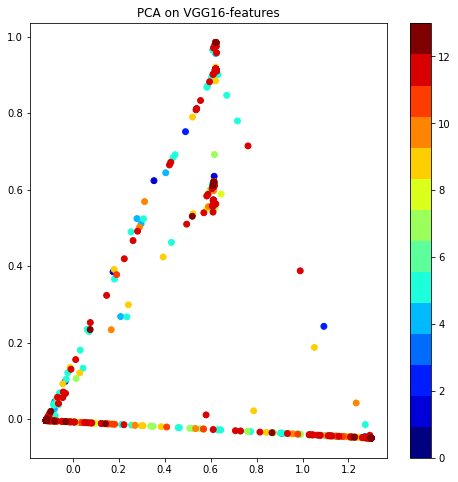

In [306]:
fig = plt.figure(figsize=(8,8))
cmap = cm.get_cmap('jet', 14)
plt.scatter(x=pca.transform(data)[:,0],
            y=pca.transform(data)[:,1],
            c=len_fol,s=35,cmap=cmap)
plt.title("PCA on VGG16-features")
plt.colorbar()
plt.show()
fig.savefig('plots/pca_vgg_all.png')

In [24]:
pca = PCA(n_components=3)
pca.fit(data)

PCA(n_components=3)

In [25]:
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.91727036 0.0408909  0.01759532]
[75.65529467 15.97364348 10.47826249]


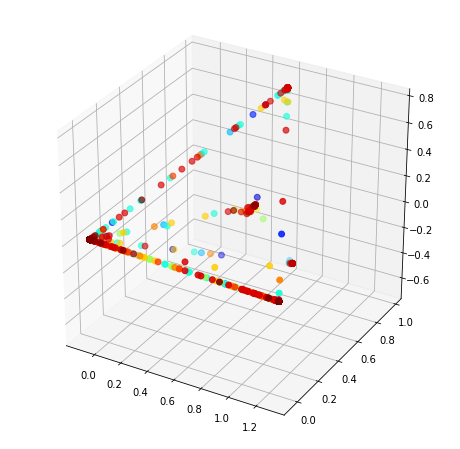

In [343]:
fig = plt.figure(figsize=(8,8))
cmap = cm.get_cmap('jet', 14)
ax = plt.axes(projection='3d')
ax.scatter3D(pca.transform(data)[:,0],
            pca.transform(data)[:,1],
             pca.transform(data)[:,2],
            c=len_fol,s=35,cmap=cmap)
# plt.title("PCA on VGG16-features")
# plt.colorbar()
# plt.show()
fig.savefig('plots/pca_vgg_all_3d.png')

In [ ]:
fig = plt.figure(figsize=(8,8))
cmap = cm.get_cmap('jet', 14)
ax = plt.axes(projection='3d')
ax.scatter3D(tsne[:,0],tsne[:,1], tsne[:,2],c=idx,s=35,cmap=cmap)
# ax.title("t-sne on vgg16 features")
# plt.colorbar()
# ax.show()

p = ax.scatter(tsne[:,0],tsne[:,1], tsne[:,2],c=idx,s=35,cmap=cmap)
ax.set_xlabel('$\psi_1$')
ax.set_ylabel('$\Phi$')
ax.set_zlabel('$\psi_2$')
# ax.set_box_aspect(1)

# fig.colorbar(p, ax=ax)

fig.savefig('plots/tsne_vgg_3D.png')

In [26]:
model = TSNE(n_components=2, random_state=0)
tsne = model.fit_transform(Data)

In [30]:
tsne.get_params

AttributeError: 'numpy.ndarray' object has no attribute 'get_params'

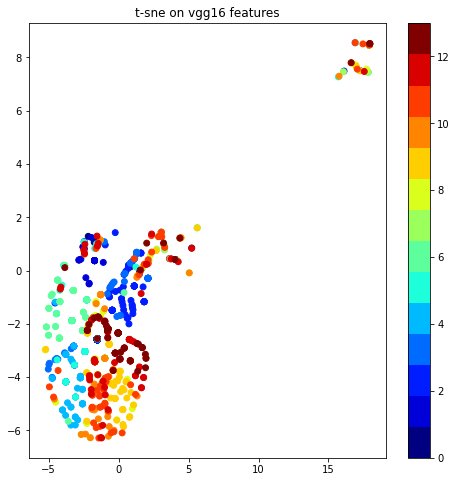

In [308]:
fig = plt.figure(figsize=(8,8))
cmap = cm.get_cmap('jet', 14)
plt.scatter(x=tsne[:,0],y=tsne[:,1],c=idx,s=35,cmap=cmap)
plt.title("t-sne on vgg16 features")
plt.colorbar()
plt.show()
fig.savefig('plots/tsne_vgg.png')

In [332]:
model = TSNE(n_components=3, random_state=0)
tsne = model.fit_transform(Data)

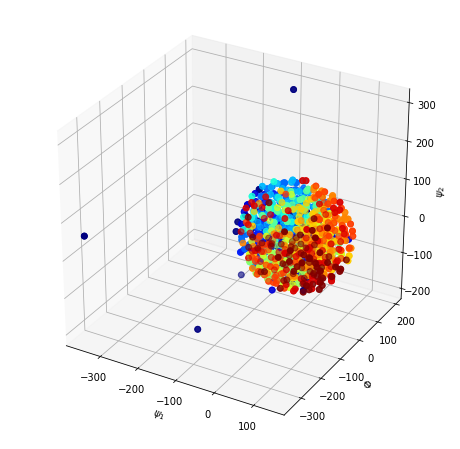

In [340]:
fig = plt.figure(figsize=(8,8))
cmap = cm.get_cmap('jet', 14)
ax = plt.axes(projection='3d')
ax.scatter3D(tsne[:,0],tsne[:,1], tsne[:,2],c=idx,s=35,cmap=cmap)
# ax.title("t-sne on vgg16 features")
# plt.colorbar()
# ax.show()

p = ax.scatter(tsne[:,0],tsne[:,1], tsne[:,2],c=idx,s=35,cmap=cmap)
ax.set_xlabel('$\psi_1$')
ax.set_ylabel('$\Phi$')
ax.set_zlabel('$\psi_2$')
# ax.set_box_aspect(1)

# fig.colorbar(p, ax=ax)

fig.savefig('plots/tsne_vgg_3D.png')

In [314]:
model = TSNE(n_components=2, random_state=0)
tsne = model.fit_transform(data)

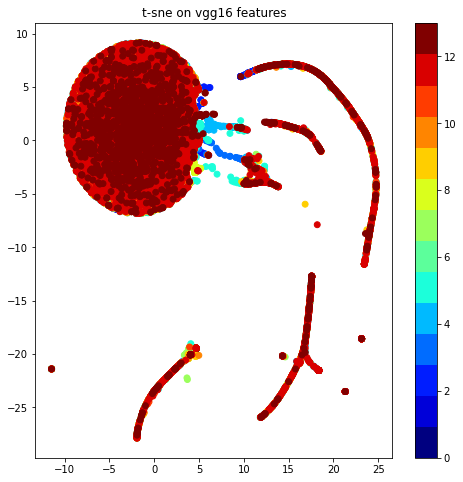

In [315]:
fig = plt.figure(figsize=(8,8))
cmap = cm.get_cmap('jet', 14)
plt.scatter(x=tsne[:,0],y=tsne[:,1],c=len_fol,s=35,cmap=cmap)
plt.title("t-sne on vgg16 features")
plt.colorbar()
plt.show()
fig.savefig('plots/tsne_vgg_all.png')

In [313]:
np.shape(data)

(39753, 14)

In [350]:
model = TSNE(n_components=3, random_state=0)
tsne = model.fit_transform(data)

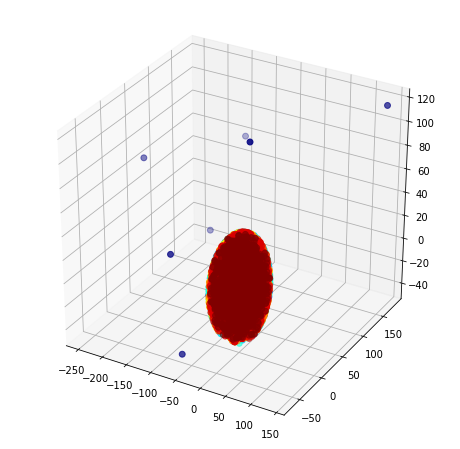

In [351]:
fig = plt.figure(figsize=(8,8))
cmap = cm.get_cmap('jet', 14)
ax = plt.axes(projection='3d')
ax.scatter3D(tsne[:,0],tsne[:,1], tsne[:,2],c=len_fol,s=35,cmap=cmap)
# ax.title("t-sne on vgg16 features")
# plt.colorbar()
# ax.show()

# p = ax.scatter(tsne[:,0],tsne[:,1], tsne[:,2],c=len_fol,s=35,cmap=cmap)
# ax.set_xlabel('$\psi_1$')
# ax.set_ylabel('$\Phi$')
# ax.set_zlabel('$\psi_2$')
# ax.set_box_aspect(1)

# fig.colorbar(p, ax=ax)

fig.savefig('plots/tsne_vgg_3D_all.png')

In [ ]:
dsgsf